In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Monthly ridership EDA

Data on ridership from the [Bart website](https://www.bart.gov/about/reports/ridership) for the year of 2023 is located in `ridership_data`. The folder contains data for Jan-September of 2023, correspondingly named `Ridership_202301` through `Ridership_202309`. Each xlsx file contains 4 sheets; Avg Weekday OD, Avg Saturday OD, Avg Sunday OD, Total Trips OD.

In each sheet, the index corresponds to the entry stations, and the column names correspond to the exit stations. Each dataset contains 50 rows and 50 columns.

I will explore total ridership for the month of January below.

In [39]:
jan_total_trips = pd.read_excel('data/ridership_data/Ridership_202301.xlsx', sheet_name='Total Trips OD', header=1, index_col='Unnamed: 0') # from total trips OD
jan_total_trips.head() # first 5 rows; currently 51rx51c

,RM,EN,EP,NB,BK,AS,MA,19,12,LM,...,SO,MB,WD,OA,WS,ML,BE,PC,AN,Exits
RM,528.0,1768.0,1433.0,840.0,5555.0,1124.0,1660.0,1260.0,1485.0,492.0,...,811.0,236.0,50.0,225.0,333.0,116.0,183.0,169.0,166.0,47016.0
EN,1923.0,743.0,1461.0,959.0,7940.0,1513.0,2289.0,2776.0,3814.0,795.0,...,1435.0,503.0,169.0,543.0,448.0,308.0,377.0,71.0,179.0,76613.0
EP,1490.0,1379.0,388.0,755.0,6333.0,906.0,1449.0,1780.0,2177.0,549.0,...,905.0,230.0,70.0,372.0,163.0,145.0,165.0,41.0,73.0,42359.0
NB,927.0,805.0,787.0,457.0,1983.0,738.0,951.0,1634.0,1437.0,417.0,...,1298.0,252.0,33.0,484.0,197.0,161.0,181.0,42.0,71.0,35999.0
BK,6245.0,8577.0,6506.0,2198.0,1107.0,3471.0,3665.0,4305.0,4640.0,1671.0,...,3146.0,1073.0,229.0,1578.0,595.0,938.0,1283.0,194.0,472.0,103880.0


Last row and last column of sheet contains total entries and exits. Seperating them from the main df:


In [40]:
jan_total_entries = jan_total_trips.iloc[len(jan_total_trips) - 1].iloc[:-1].to_frame()
total_entries_and_exits = jan_total_entries.iloc[-1]
jan_total_exits = jan_total_trips[jan_total_trips.columns[-1]].iloc[:-1].to_frame()

In [41]:
jan_total_trips = pd.read_excel('data/ridership_data/Ridership_202301.xlsx', sheet_name='Total Trips OD', header=1, index_col='Unnamed: 0') # from total trips OD
jan_total_trips.drop(jan_total_trips.columns[len(jan_total_trips.columns)-1], axis=1, inplace=True) # dropping last row - contains total entries for each station
jan_total_trips.drop(jan_total_trips.tail(1).index,inplace=True) # dropping last column - contains total exits for each station
jan_total_trips.head() # first 5 rows; currently 50rx50c

,RM,EN,EP,NB,BK,AS,MA,19,12,LM,...,SB,SO,MB,WD,OA,WS,ML,BE,PC,AN
RM,528.0,1768.0,1433.0,840.0,5555.0,1124.0,1660.0,1260.0,1485.0,492.0,...,287.0,811.0,236.0,50.0,225.0,333.0,116.0,183.0,169.0,166.0
EN,1923.0,743.0,1461.0,959.0,7940.0,1513.0,2289.0,2776.0,3814.0,795.0,...,453.0,1435.0,503.0,169.0,543.0,448.0,308.0,377.0,71.0,179.0
EP,1490.0,1379.0,388.0,755.0,6333.0,906.0,1449.0,1780.0,2177.0,549.0,...,136.0,905.0,230.0,70.0,372.0,163.0,145.0,165.0,41.0,73.0
NB,927.0,805.0,787.0,457.0,1983.0,738.0,951.0,1634.0,1437.0,417.0,...,85.0,1298.0,252.0,33.0,484.0,197.0,161.0,181.0,42.0,71.0
BK,6245.0,8577.0,6506.0,2198.0,1107.0,3471.0,3665.0,4305.0,4640.0,1671.0,...,318.0,3146.0,1073.0,229.0,1578.0,595.0,938.0,1283.0,194.0,472.0


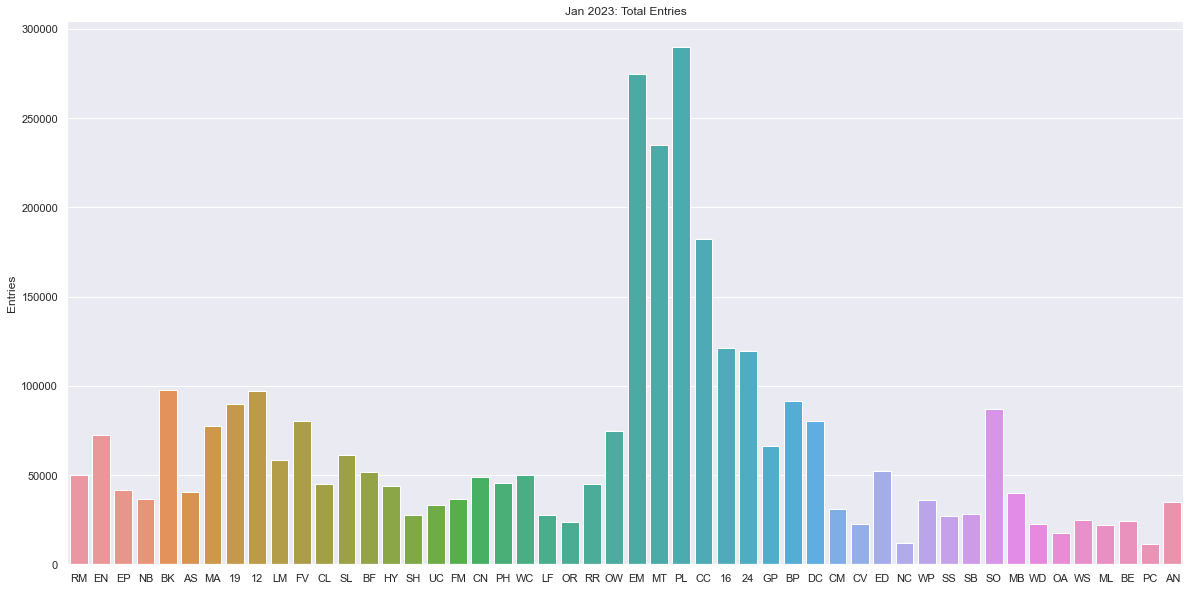

In [45]:
sns.barplot(data=jan_total_entries, x=jan_total_entries.index, y=jan_total_entries['Entries'])
sns.set(rc={'figure.figsize':(20,10)})
plt.title('Jan 2023: Total Entries');

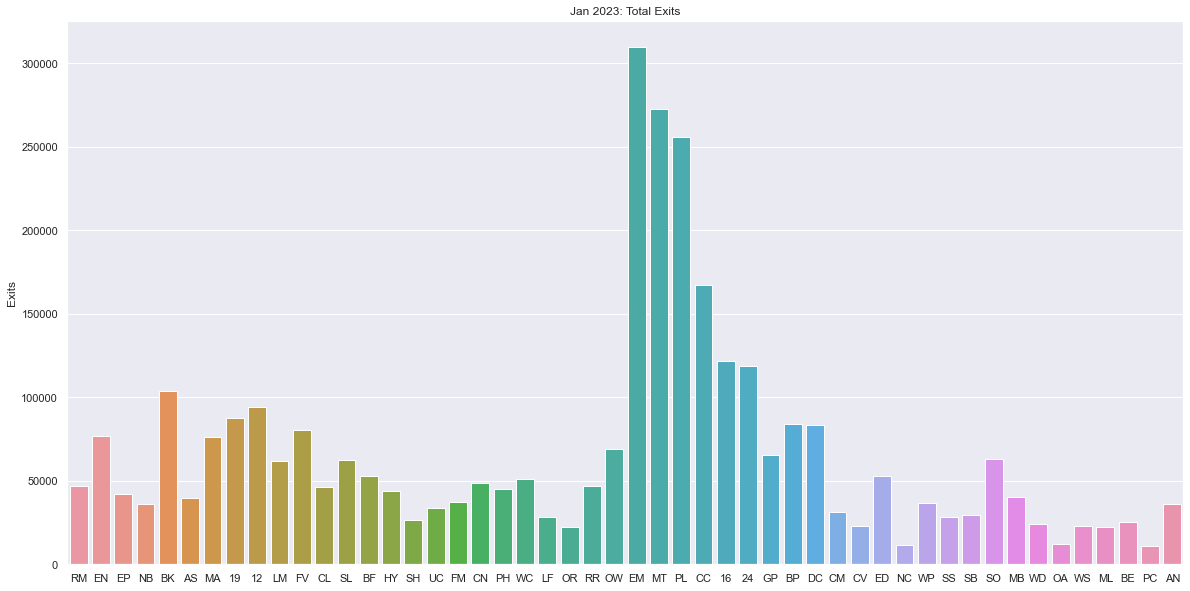

In [46]:
sns.barplot(data=jan_total_exits, x=jan_total_exits.index, y=jan_total_exits['Exits'])
sns.set(rc={'figure.figsize':(20,10)})
plt.title('Jan 2023: Total Exits');

## Annual ridership (1973-2020)

Data on annual ridership from the [Bart website](https://www.bart.gov/about/reports/ridership) for the period of the fiscal years of 1973-2020 is located in `ridership_data` under `BART_Ridership_FY73_FY20`.

In [53]:
ann_rider = pd.read_excel('data/ridership_data/BART_Ridership_FY73_FY20.xlsx', header=2, index_col='Fiscal Year')
ann_rider=ann_rider.tail(-1) # removing first row
ann_rider

,Total Annual Exits,Annual % Change,Average Weekday Exits,Annual % Change.1,Average Saturday Exits,Annual % Change.2,Average Sunday Exits,Annual % Change.3,Unnamed: 9,Annualization
Fiscal Year,,,,,,,,,,
FY73,4591241.0,NaN,32000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FY74,13960680.0,2.040720,57399.5,0.793734,NaN,NaN,NaN,NaN,NaN,NaN
FY75,27876794.0,0.996808,118003,1.055819,NaN,NaN,NaN,NaN,NaN,NaN
FY76,32897431.0,0.180101,131000,0.110141,NaN,NaN,NaN,NaN,NaN,NaN
FY77,34599088.0,0.051726,133453,0.018725,NaN,NaN,NaN,NaN,NaN,NaN
FY78,38655206.0,0.117232,146780,0.099863,NaN,NaN,NaN,NaN,NaN,NaN
FY79,41191566.0,0.065615,151712,0.033601,NaN,NaN,NaN,NaN,NaN,NaN
FY80,34482335.0,-0.162879,148682,-0.019972,NaN,NaN,NaN,NaN,NaN,NaN
FY81,46879319.0,0.359517,161965,0.089338,NaN,NaN,NaN,NaN,NaN,NaN
